### COLLECTING DATA

In [83]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
pwd = os.getcwd()
filepath = os.path.join(pwd, "housing.csv")

In [85]:
pwd = os.getcwd()
pwd

"e:\\OneDrive\\Desktop\\Hand's On ML\\ML_Projects\\Real_Estate_Price_prediction_Model\\Jupiter_notebook"

In [86]:
housing = pd.read_csv(filepath)

In [87]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [88]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [89]:
housing.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0             NEAR OCEAN         1
-118.19    34.12     35.0                2524.0       749.0           2487.0      679.0       2.4932         167700.0            <1H OCEAN          1
           34.13     52.0                2012.0       458.0           1314.0      434.0       3.9250         180400.0            <1H OCEAN          1
                     50.0                1309.0       302.0           883.0       293.0       3.1287         198000.0            <1H OCEAN          1
           34.12     52.0                679.0        132.0           483.0       163.0       4.2344         162500.0            <1H OCEAN          1
                                                                                                         

In [90]:
print(dir(os))

['DirEntry', 'EX_OK', 'F_OK', 'GenericAlias', 'Mapping', 'MutableMapping', 'O_APPEND', 'O_BINARY', 'O_CREAT', 'O_EXCL', 'O_NOINHERIT', 'O_RANDOM', 'O_RDONLY', 'O_RDWR', 'O_SEQUENTIAL', 'O_SHORT_LIVED', 'O_TEMPORARY', 'O_TEXT', 'O_TRUNC', 'O_WRONLY', 'P_DETACH', 'P_NOWAIT', 'P_NOWAITO', 'P_OVERLAY', 'P_WAIT', 'PathLike', 'R_OK', 'SEEK_CUR', 'SEEK_END', 'SEEK_SET', 'TMP_MAX', 'W_OK', 'X_OK', '_AddedDllDirectory', '_Environ', '__all__', '__builtins__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_check_methods', '_execvpe', '_exists', '_exit', '_fspath', '_get_exports_list', '_walk_symlinks_as_files', '_wrap_close', 'abc', 'abort', 'access', 'add_dll_directory', 'altsep', 'chdir', 'chmod', 'close', 'closerange', 'cpu_count', 'curdir', 'defpath', 'device_encoding', 'devnull', 'dup', 'dup2', 'environ', 'error', 'execl', 'execle', 'execlp', 'execlpe', 'execv', 'execve', 'execvp', 'execvpe', 'extsep', 'fdopen', 'fsdecode', 'fsencode', 'fspath', 'fstat', 'fsync

In [91]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [92]:
housing["latitude"].describe() #describe shows mean, std deviation, min, max

count    20640.000000
mean        35.631861
std          2.135952
min         32.540000
25%         33.930000
50%         34.260000
75%         37.710000
max         41.950000
Name: latitude, dtype: float64

In [93]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


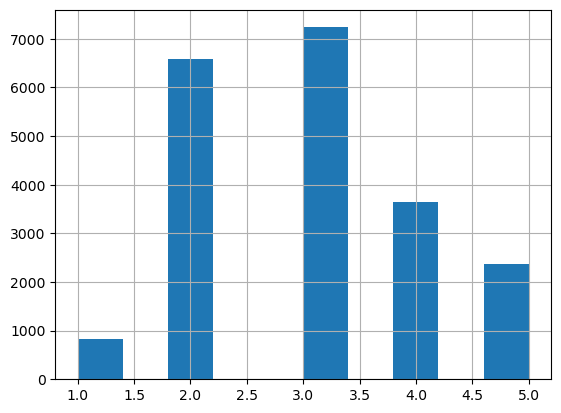

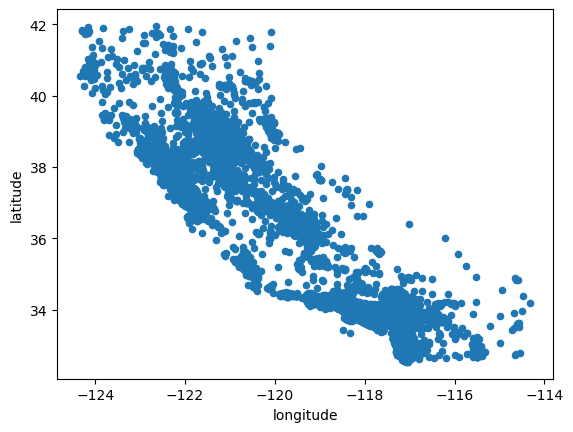

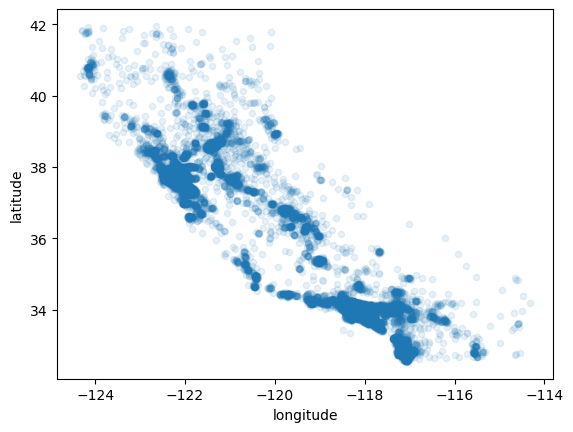

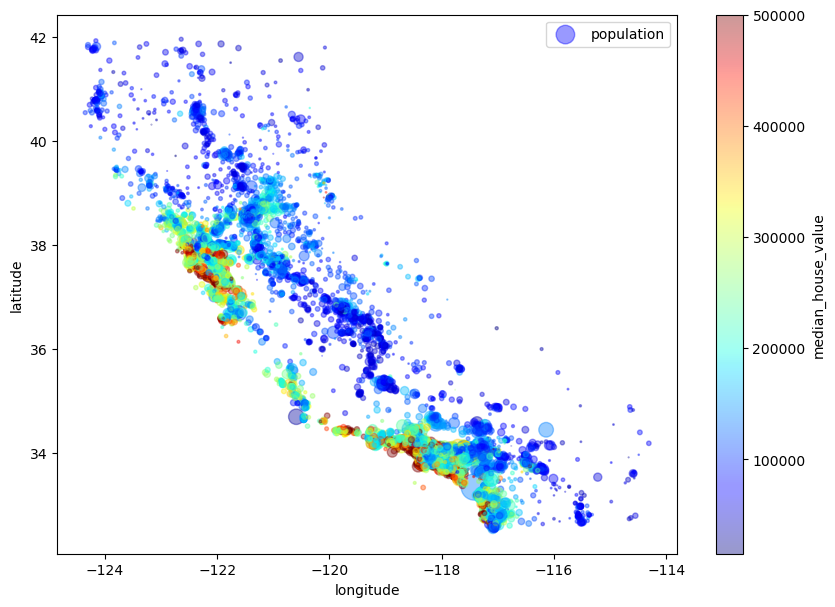

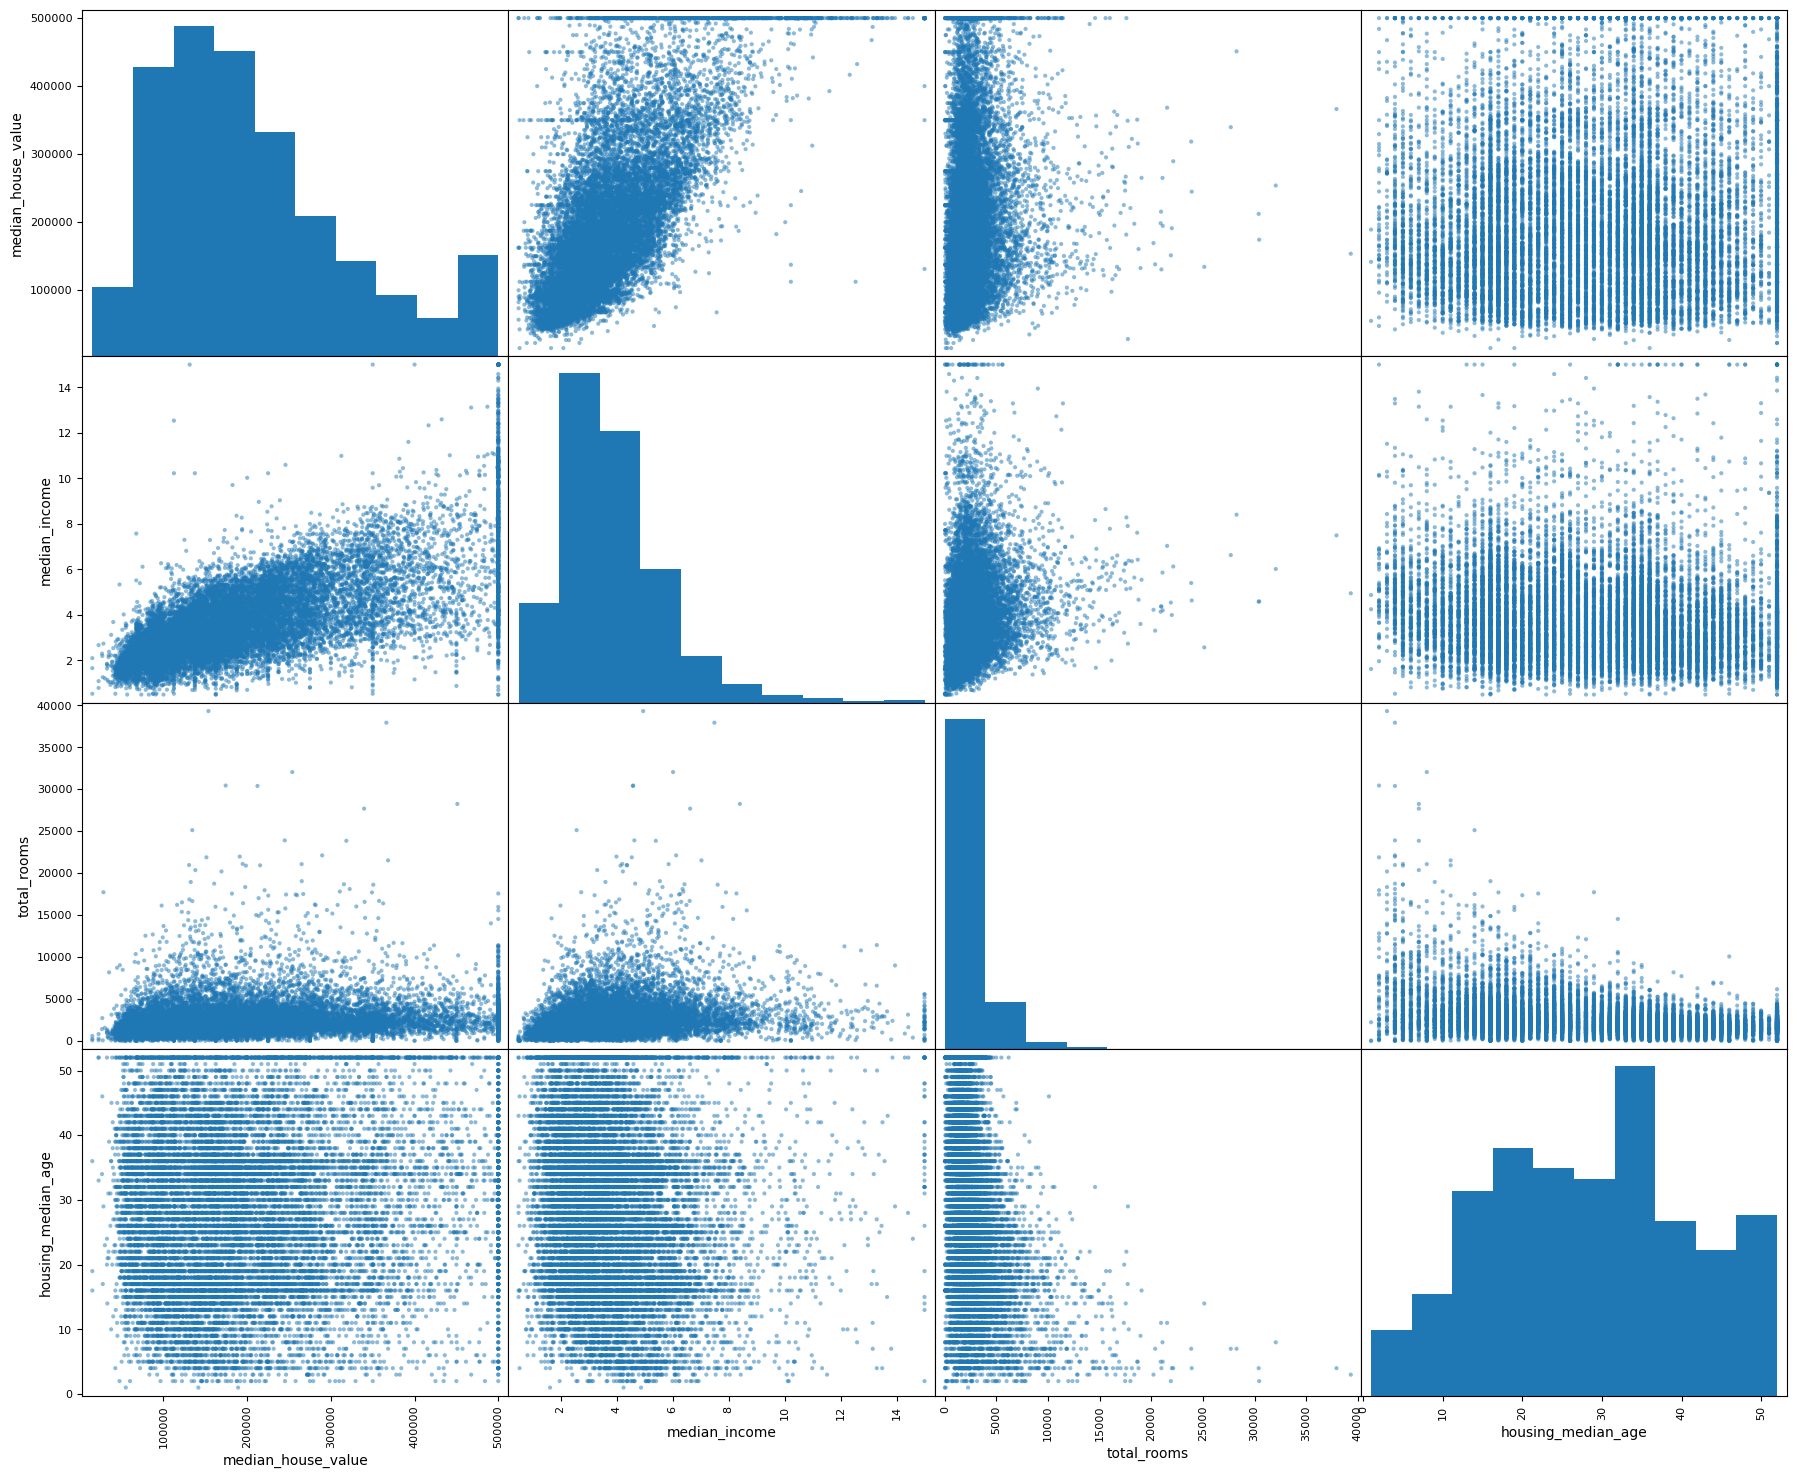

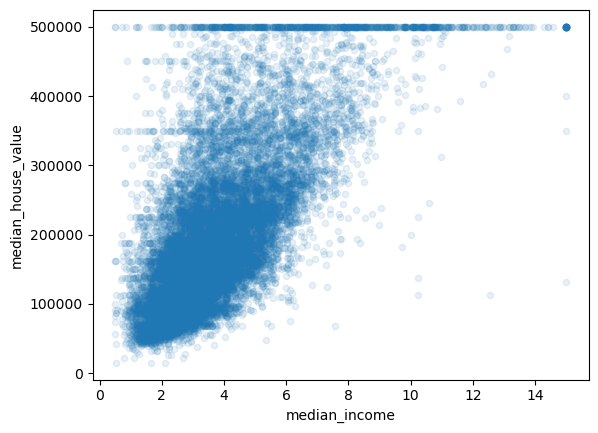

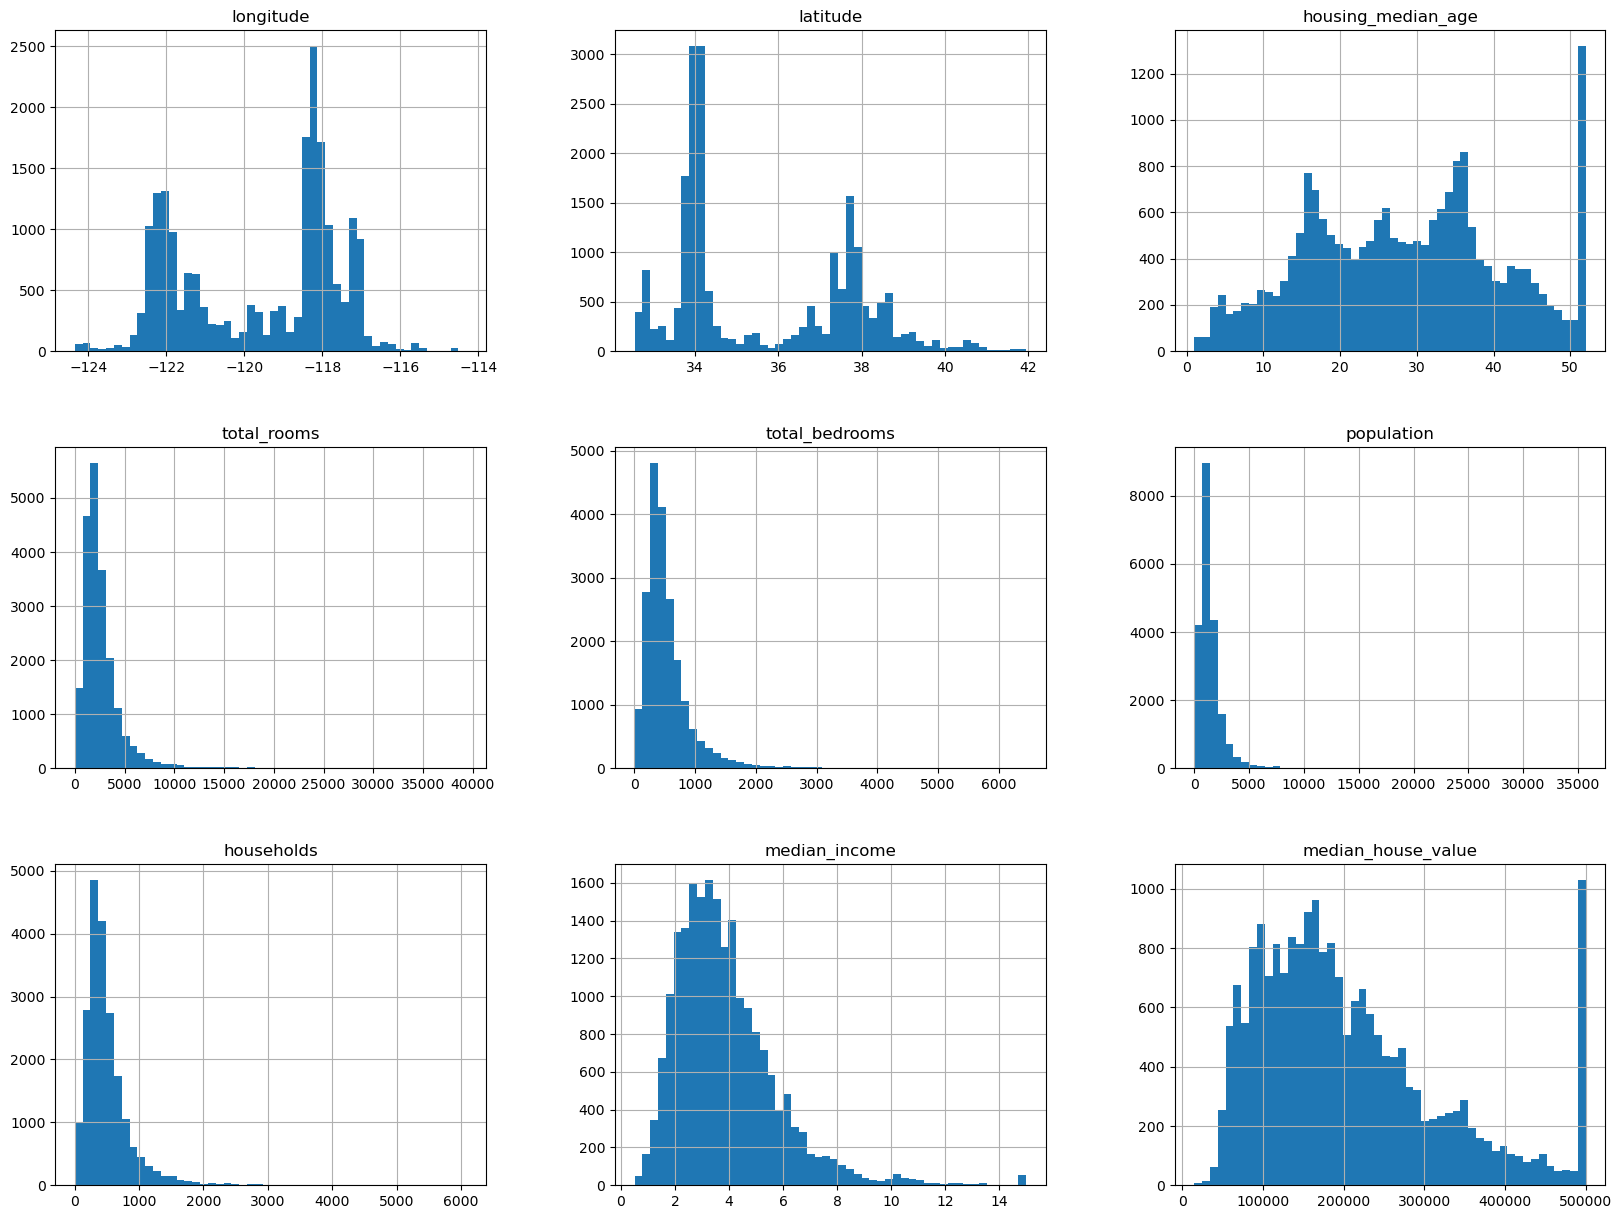

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [95]:
# making test and train datasets
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [96]:
train_set, test_set = split_train_test(housing, 0.2)

In [97]:
len(train_set)

16512

In [98]:
len(test_set)

4128

## INDEXING

In [99]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32

In [100]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [101]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [102]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [103]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [104]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5])

In [105]:
housing["income_cat"].hist()

<Axes: >

In [106]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [107]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [108]:
(strat_test_set["income_cat"].value_counts()/len(strat_test_set)).describe()

count    5.000000
mean     0.200000
std      0.132551
min      0.039971
25%      0.114341
50%      0.176357
75%      0.318798
max      0.350533
Name: count, dtype: float64

In [109]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [110]:
housing = strat_train_set.copy()

In [111]:
housing.plot( kind='scatter', x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

In [112]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

In [113]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

<Axes: xlabel='longitude', ylabel='latitude'>

In [114]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing['ocean_proximity'] = encoder.fit_transform(housing['ocean_proximity'])

In [115]:
corr_matrix = housing.corr()

In [116]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
ocean_proximity       0.076936
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [117]:
from pandas.plotting import scatter_matrix

In [118]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(22,18))

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

In [119]:
housing.plot(kind="scatter", x="median_income", y= "median_house_value", alpha=0.1)

<Axes: xlabel='median_income', ylabel='median_house_value'>

In [120]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [121]:
corr_matrix = housing.corr()

In [122]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
ocean_proximity             0.076936
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [123]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Fix missing values


### option 1 get rid of the data dropna (housing.dropna(subset=["total_bedrooms"]))
### option 2 get rid of the whole attribute (housing.dropna(subset=["total_bedrooms"]))
### option 3 set the values to some value(zero, the mean, the meidan (median = housing["total_bedrooms"].median())

In [124]:
# we will use option 3  here
median = housing["total_bedrooms"].median()

In [125]:
housing.fillna({"total_bedrooms":median}, inplace=True)

In [126]:
# sklearns SImpleImputer replace each attributes missing value with median of that attributes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [127]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [128]:
# fit the instance to the training data using the method imputer fit()

In [129]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [130]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [131]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [132]:
X = imputer.transform(housing_num)

In [133]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# Handling Text and Categorical Attributes


In [134]:
housing_cat = housing[['ocean_proximity']]

In [135]:
housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [136]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat_encoded = OrdinalEncoder().fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [137]:
ordinal_encoder = OrdinalEncoder()


In [138]:
from sklearn.preprocessing import OneHotEncoder
housing_cat_1hot = OneHotEncoder().fit_transform(housing_cat)
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [139]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [140]:
import sys
sys.path.append("E:\OneDrive\Desktop\Hand's On ML\ML_Projects\Real_Estate_Price_prediction_Model\web_app")
from custom_transformer import CombinedAttributesAdder

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\O'
C:\Users\asus\AppData\Local\Temp\ipykernel_13752\2101107619.py:2: SyntaxWarning: invalid escape sequence '\O'
  sys.path.append("E:\OneDrive\Desktop\Hand's On ML\ML_Projects\Real_Estate_Price_prediction_Model\web_app")


In [141]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy="median")),
                ('attribs_adder', CombinedAttributesAdder()),
                ('std_scaler', StandardScaler()),
                ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [142]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [143]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [144]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [145]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [146]:
from sklearn.metrics import mean_squared_error
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


In [147]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [148]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [149]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818069


In [150]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor()

In [151]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels)
forest_rmse_scores = np.sqrt(-forest_scores)

18763.137093476522


C:\Users\asus\AppData\Local\Temp\ipykernel_13752\835759014.py:6: RuntimeWarning: invalid value encountered in sqrt
  forest_rmse_scores = np.sqrt(-forest_scores)


In [152]:
display_scores(forest_rmse_scores)

Scores: [nan nan nan nan nan]
Mean: nan
Standard deviation: nan


In [153]:
import joblib
joblib.dump(lin_reg, "lin_reg.joblib")
joblib.dump(tree_reg, "tree_reg.joblib")
joblib.dump(forest_reg, "forest_reg.joblib")
joblib.dump(forest_reg, "model.joblib")

lin_reg_loaded = joblib.load("lin_reg.joblib")
tree_reg_loaded = joblib.load("tree_reg.joblib")   
forest_reg_loaded = joblib.load("forest_reg.joblib")

joblib.dump(full_pipeline, "full_pipeline.joblib")

['full_pipeline.joblib']

In [154]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [155]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [156]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [157]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64175.607442423716 {'max_features': 2, 'n_estimators': 3}
55481.41867479439 {'max_features': 2, 'n_estimators': 10}
52737.332013150866 {'max_features': 2, 'n_estimators': 30}
60135.3696624139 {'max_features': 4, 'n_estimators': 3}
52883.31121716359 {'max_features': 4, 'n_estimators': 10}
50337.680139669945 {'max_features': 4, 'n_estimators': 30}
59001.561728915476 {'max_features': 6, 'n_estimators': 3}
52844.19228405391 {'max_features': 6, 'n_estimators': 10}
50039.27912229452 {'max_features': 6, 'n_estimators': 30}
58033.241221087774 {'max_features': 8, 'n_estimators': 3}
52192.59986554777 {'max_features': 8, 'n_estimators': 10}
50166.929530108384 {'max_features': 8, 'n_estimators': 30}
62129.921074828184 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54076.67784743014 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59886.4749769293 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52918.3454147222 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [158]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.56106952e-02, 6.84289321e-02, 4.27066579e-02, 1.76209046e-02,
       1.70359172e-02, 1.77527703e-02, 1.57824980e-02, 3.26287349e-01,
       5.74458710e-02, 1.07039829e-01, 8.20953377e-02, 1.62140340e-02,
       1.47132834e-01, 6.47767409e-05, 3.24850324e-03, 5.53309020e-03])

In [159]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3262873492390038, 'median_income'),
 (0.14713283376020528, 'INLAND'),
 (0.10703982891080446, 'pop_per_hhold'),
 (0.08209533765281941, 'bedrooms_per_room'),
 (0.07561069516098888, 'longitude'),
 (0.06842893213772996, 'latitude'),
 (0.05744587096191667, 'rooms_per_hhold'),
 (0.042706657894043897, 'housing_median_age'),
 (0.01775277034240824, 'population'),
 (0.017620904582913252, 'total_rooms'),
 (0.01703591718970913, 'total_bedrooms'),
 (0.016214034021752352, '<1H OCEAN'),
 (0.01578249795829264, 'households'),
 (0.0055330902036713646, 'NEAR OCEAN'),
 (0.0032485032428502714, 'NEAR BAY'),
 (6.477674089030964e-05, 'ISLAND')]

In [160]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)


In [161]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2

In [162]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45977.13794556, 49915.5059067 ])

In [163]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [164]:
housing.median_income.describe()

count    16512.000000
mean         3.875884
std          1.904931
min          0.499900
25%          2.566950
50%          3.541550
75%          4.745325
max         15.000100
Name: median_income, dtype: float64